In [8]:
%pylab inline
import sys
sys.path.append('../code/')
import coefficients_analysis as anlm
from mwlmc_bfe import smooth_coeff
import gala.potential as gp
import biff
font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
mass = 1.577212551813858917e-06
path = '/media/ngaravito/4fb4fd3d-1665-4892-a18d-bdbb1185a07b/BFE/'
covmat_lmc_path = 'bfe_LMC3_bound_b0_covmat_sample_'
coeff_lmc_path = 'bfe_LMC3_bound_b0_coeff_sample_'

covmat_mwlmc_path = 'bfe_MWLMC3_unbound_100M_b0_covmat_sample_'
coeff_mwlmc_path = 'bfe_MWLMC3_unbound_100M_b0_coeff_sample_'

covmat_mw_path = 'bfe_MWLMC3_100M_b0_covmat_sample_'
coeff_mw_path = 'bfe_MWLMC3_100M_b0_coeff_sample_'


In [44]:
S_lmc, T_lmc, N_lmc, SN_lmc  = smooth_coeff(path+coeff_lmc_path, path+covmat_lmc_path, 
                                            0, 11, 20, 20, 20, 8, mass, snap=90, sn_out=1)


../code/coefficients_smoothing.py:100: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [45]:
S_mwlmc, T_mwlmc, N_mwlmc, SN_mwlmc  = smooth_coeff(path+coeff_mwlmc_path, 
                                                    path+covmat_mwlmc_path, 
                                                    0, 11, 20, 20, 20, 4, 
                                                    mass, snap=90, sn_out=1)

S_mw, T_mw, N_mw, SN_mw  = smooth_coeff(path+coeff_mw_path, 
                                        path+covmat_mw_path, 
                                        0, 11, 20, 20, 20, 4, 
                                        mass, snap=90, sn_out=1)

../code/coefficients_smoothing.py:100: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [46]:
U_lmc = anlm.coeff_energy(S_lmc, T_lmc, 0, 21, 21)
U_mwlmc = anlm.coeff_energy(S_mwlmc, T_mwlmc, 0, 21, 21)
U_mw = anlm.coeff_energy(S_mw, T_mw, 0, 21, 21)

In [47]:
print(N_lmc, N_mw, N_mwlmc)

184 429 290


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


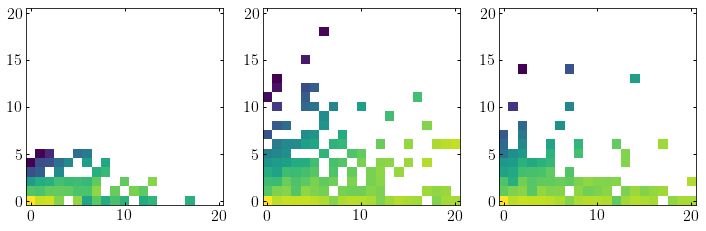

In [48]:
fig, ax  = subplots(1, 3, figsize=(12, 4))
ax[0].imshow(np.log10(np.abs(U_lmc)).T, origin='lower')
ax[1].imshow(np.log10(np.abs(U_mw)).T, origin='lower')
ax[2].imshow(np.log10(np.abs(U_mwlmc)).T, origin='lower')

In [49]:
y_grid = np.arange(-200, 200, 1.5)
z_grid = np.arange(-200, 200, 1.5)
y_grid, z_grid = meshgrid(y_grid, z_grid)
bins=len(np.arange(-200, 200, 1.5))

In [50]:
rho_mw = biff.density(np.ascontiguousarray(xyz), S_mw, T_mw, M=1, r_s=40.85)

S_000 = np.zeros((1, 1, 1))
T_000 = np.zeros((1, 1, 1))
S_000[0][0][0] = S_mw[0][0][0]

rho_mw_base = biff.density(np.ascontiguousarray(xyz), S_000, T_000, M=1, r_s=40.85)

rho_mwlmc = biff.density(np.ascontiguousarray(xyz), S_mwlmc, T_mwlmc, M=1, r_s=40.85)

S_000 = np.zeros((1, 1, 1))
T_000 = np.zeros((1, 1, 1))
S_000[0][0][0] = S_mwlmc[0][0][0]

rho_mwlmc_base = biff.density(np.ascontiguousarray(xyz), S_000, T_000, M=1, r_s=40.85)




(-200, 200)

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


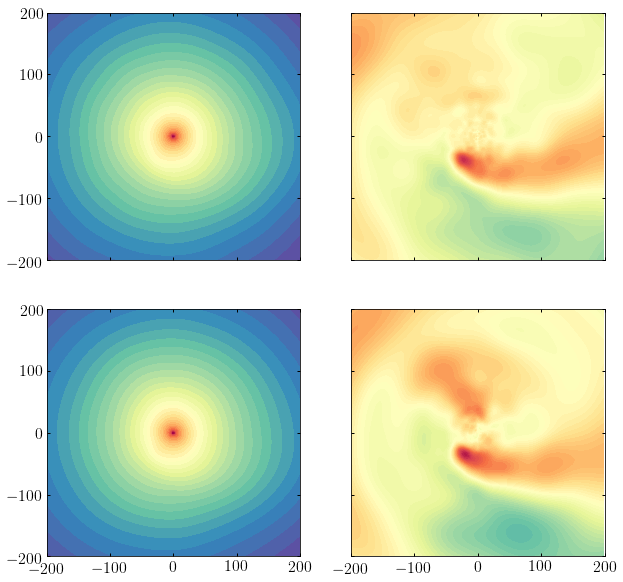

In [51]:
fig, ax = subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

#title('N coefficients={:02d}'.format(N_mw))
ax[0][0].contourf(y_grid, z_grid, np.log10(np.abs(rho_mw)).reshape(bins, bins), 50,
                 origin='lower', cmap='Spectral_r', vmin=-7, vmax=-1.65)

ax[0][0].set_xlim(-200, 200)
ax[0][0].set_ylim(-200, 200)
#colorbar()

ax[0][1].contourf(y_grid, z_grid, ((rho_mw/rho_mw_base)-1).reshape(bins, bins), 50,
                 origin='lower', cmap='Spectral_r', vmin=-0.45, vmax=0.45)

ax[0][1].set_xlim(-200, 200)
ax[0][1].set_ylim(-200, 200)

ax[1][0].contourf(y_grid, z_grid, np.log10(np.abs(rho_mwlmc)).reshape(bins, bins), 50,
                 origin='lower', cmap='Spectral_r', vmin=-7, vmax=-1.65)

ax[1][0].set_xlim(-200, 200)
ax[1][0].set_ylim(-200, 200)
#colorbar()

ax[1][1].contourf(y_grid, z_grid, ((rho_mwlmc/rho_mwlmc_base)-1).reshape(bins, bins), 50,
                 origin='lower', cmap='Spectral_r', vmin=-0.45, vmax=0.45)

ax[1][1].set_xlim(-200, 200)
ax[1][1].set_ylim(-200, 200)


/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


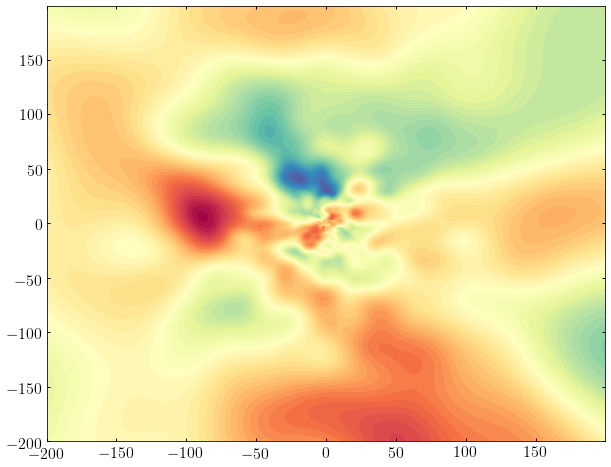

In [52]:
figsize=(5,5)
contourf(y_grid, z_grid, ((rho_mw/rho_mwlmc)-1).reshape(bins, bins), 50,
         origin='lower', cmap='Spectral_r')
